# Regularized models

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Generate some random training data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
print(X.shape)
print(y.shape)
print(X_new.shape)

(20, 1)
(20, 1)
(100, 1)


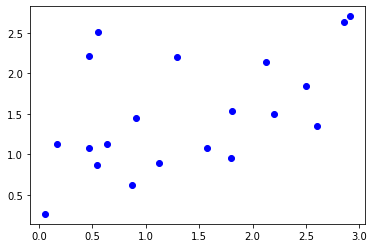

In [24]:
plt.plot(X,y,'bo')

### Consider the data. Is this data linear or polynomial or what?

### Compare Linear and Polynomial Fit

In [25]:
# Here is a usefull list of all the functions we have been using:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

(20, 1)


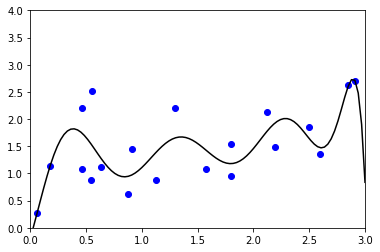

In [26]:
# Define all the functions you want to apply
poly_features = PolynomialFeatures(degree=10, include_bias=False)
scale = StandardScaler()
lin_reg = LinearRegression()

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("scale", scale),
            ("lin_reg", lin_reg),
        ])

# Do the learning
polynomial_regression.fit(X, y)


# Plot the resulting line
X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_new = polynomial_regression.predict(X_new)
plt.plot(X,y,'bo')
plt.plot(X_new,y_new,'k')
plt.axis([0.,3.,0.,4.])

y_train = polynomial_regression.predict(X)
mean_squared_error(y,y_train)
print(y_train.shape)

### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge

In [7]:
# Ridge Regression with the Cholesky solver 
# cholesky =  this is a closed form solver that improves performance due to a matrix factorizatoin.
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

#### The code below gives examples of other ways to implement Ridge Regression

In [8]:
# This is an example of Ridge Regression with a numerical solver
# sag = stochastic gradient descent

#ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])

In [9]:
# Another example of Ridge REgression using SDGRegressor with an L2 penalty

#sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
#sgd_reg.fit(X, y.ravel())
#sgd_reg.predict([[1.5]])

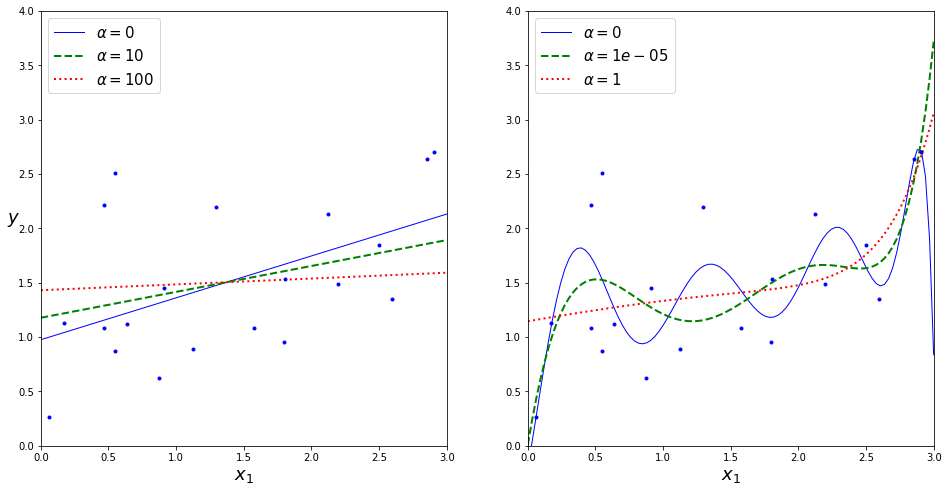

In [10]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(16,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

**Note**: to be future-proof, we set `max_iter=1000` and `tol=1e-3` because these will be the default values in Scikit-Learn 0.21.

### What does the parameter $\alpha$ do here?

###  <span style="color:red">Caution:</span> it is even more important when doing regularization to normalize your data. If you don't scale your data, the $\theta^2$ type terms will really slow down and possibly ruin your numerical optimizers.

### For classification problems you can do the same thing!

In sklearn you could call RidgeClassifier() with similar parameters - BUT reading the documentation on the function we have been using, LogisticRegression(), you should find:

###### "This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default." 

###### The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

###### penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

###### Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.


### Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
#lasso_reg.predict([[1.5]])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\samsi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827439, tolerance: 0.0009294783355207351
  positive)


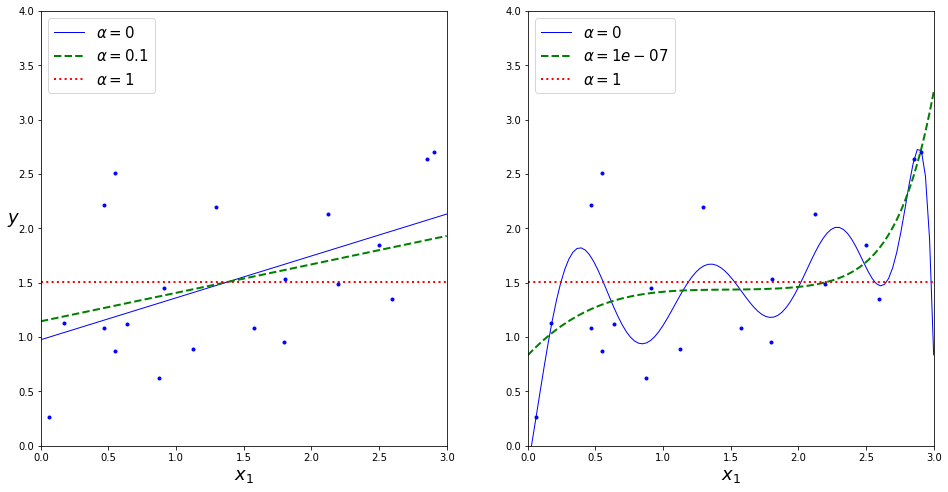

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

### ElasticNet Regression

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

C:\Users\samsi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8030743129029654, tolerance: 0.0009294783355207351
  positive)


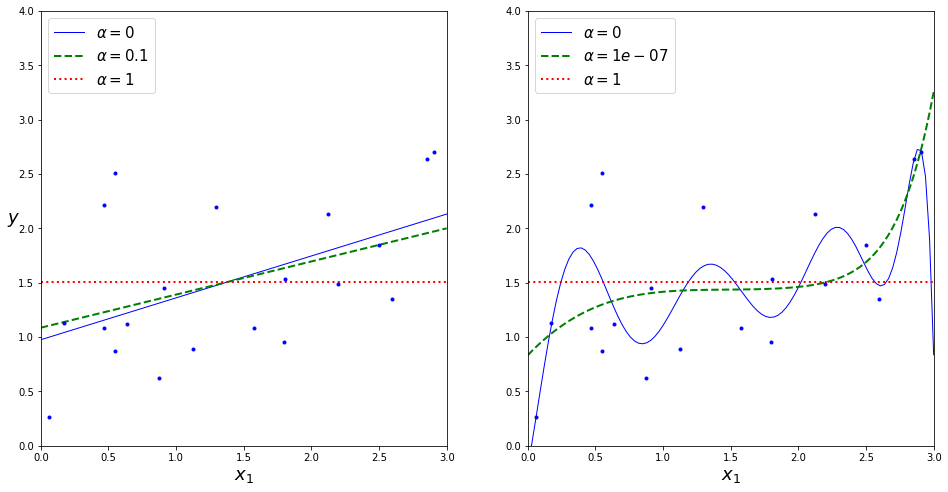

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

### Alternatively you could try early stopping 

(25,)

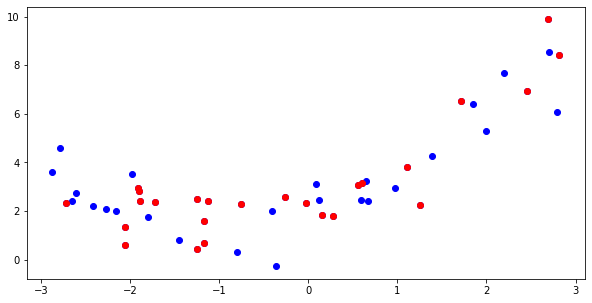

In [31]:
np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

plt.figure(figsize=(10,5))
plt.plot(X,y,'bo')

X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.5, random_state=10)
plt.plot(X_train,y_train,'ro')
y_val.shape

### We can try to model the data above with a high degree polynomial, but stop learning right at the point when we start to overfit

In [34]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
# SGDRegressor fits a linear model

# Define the model
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

# Normalize both the training and validation data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Do the training using SGD regression
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
# When you sent warm_start=True you continue training where you left off rather than starting fresh.
# penalty = None means that you are NOT doing Regularization

minimum_val_error = float("inf")
best_epoch = None
best_model = None

# Train in epochs
for epoch in range(1000):
    # Train the model for the current epoch
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    # Predict using the current theta values
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    # Find the validation error
    val_error = mean_squared_error(y_val, y_val_predict)
    # Check to see if we did better if so save the model
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### Now we want to graph our training and validation error for each epoch

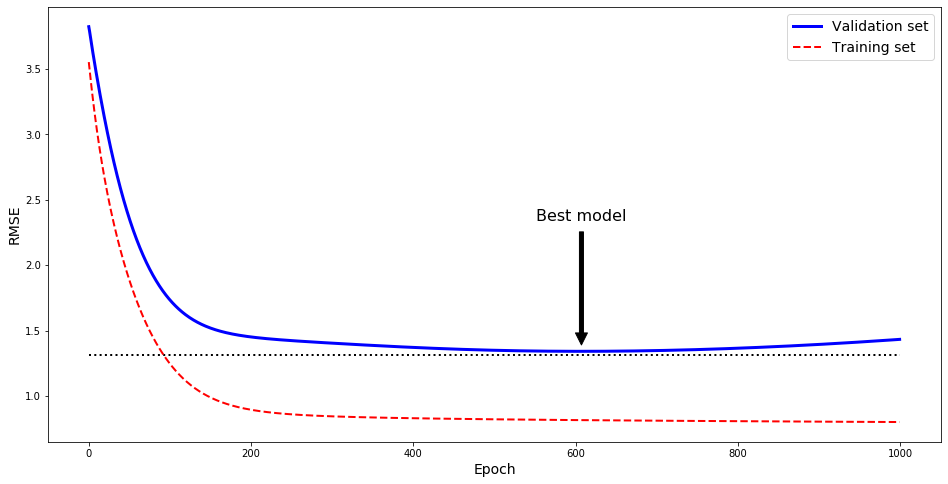

In [35]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)


n_epochs = 1000
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(16,8))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [20]:
best_epoch, best_model

(607,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))